In [12]:
import numpy as np
from skimage import color

import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import operator
import colorsys
import os

In [13]:
colors_dict = {
"0048BA":"Absolute Zero","B0BF1A":"Acid green","7CB9E8":"Aero","C9FFE5":"Aer o blue","B284BE":"African violet","72A0C1":"Air superiority blue","EDEAE0":"Alabaster","F0F8FF":"Alice blue","C46210":"Alloy orange","EFDECD":"Almond","E52B50":"Amaranth","9F2B68":"Amaranth (M&P)","F19CBB":"Amaranth pink","AB274F":"Amaranth purple","D3212D":"Amaranth red","3B7A57":"Amazon","FFBF00":"Amber","FF7E00":"Amber (SAE/ECE)","9966CC":"Amethyst","A4C639":"Android green","CD9575":"Antique brass","665D1E":"Antique bronze","915C83":"Antique fuchsia","841B2D":"Antique ruby","FAEBD7":"Antique white","008000":"Ao (English)",
"8DB600":"Apple green","FBCEB1":"Apricot","00FFFF":"Aqua","7FFFD4":"Aquamarine","D0FF14":"Arctic lime","4B5320":"Army green","8F9779":"Artichoke","E9D66B":"Arylide yellow","B2BEB5":"Ash gray","87A96B":"Asparagus","FF9966":"Atomic tangerine","A52A2A":"Auburn","FDEE00":"Aureolin","568203":"Avocado","007FFF":"Azure","F0FFFF":"Azure (X11/web color)","89CFF0":"Baby blue","A1CAF1":"Baby blue eyes","F4C2C2":"Baby pink","FEFEFA":"Baby powder","FF91AF":"Baker-Miller pink","FAE7B5":"Banana Mania","DA1884":"Barbie Pink","7C0A02":"Barn red","848482":"Battleship grey","BCD4E6":"Beau blue",
"9F8170":"Beaver","F5F5DC":"Beige","2E5894":"B'dazzled blue","9C2542":"Big dip o’ruby","FFE4C4":"Bisque","3D2B1F":"Bistre","967117":"Bistre brown","CAE00D":"Bitter lemon","BFFF00":"Bitter lime","FE6F5E":"Bittersweet","BF4F51":"Bittersweet shimmer","000000":"Black","3D0C02":"Black bean","1B1811":"Black chocolate","3B2F2F":"Black coffee","54626F":"Black coral","3B3C36":"Black olive","BFAFB2":"Black Shadows","FFEBCD":"Blanched almond","A57164":"Blast-off bronze","318CE7":"Bleu de France","ACE5EE":"Blizzard blue","FAF0BE":"Blond","660000":"Blood red","0000FF":"Blue","1F75FE":"Blue (Crayola)",
"0093AF":"Blue (Munsell)","0087BD":"Blue (NCS)","0018A8":"Blue (Pantone)","333399":"Blue (pigment)","0247FE":"Blue (RYB)","A2A2D0":"Blue bell","6699CC":"Blue-gray","0D98BA":"Blue-green","064E40":"Blue-green (color wheel)","5DADEC":"Blue jeans","126180":"Blue sapphire","8A2BE2":"Blue-violet","7366BD":"Blue-violet (Crayola)","4D1A7F":"Blue-violet (color wheel)","5072A7":"Blue yonder","3C69E7":"Bluetiful","DE5D83":"Blush","79443B":"Bole","E3DAC9":"Bone","006A4E":"Bottle green","87413F":"Brandy","CB4154":"Brick red","66FF00":"Bright green","D891EF":"Bright lilac","C32148":"Bright maroon","1974D2":"Bright navy blue",
"FFAA1D":"Bright yellow (Crayola)","FF55A3":"Brilliant rose","FB607F":"Brink pink","004225":"British racing green","CD7F32":"Bronze","88540B":"Brown","AF6E4D":"Brown sugar","1B4D3E":"Brunswick green","7BB661":"Bud green","F0DC82":"Buff","800020":"Burgundy","DEB887":"Burlywood","A17A74":"Burnished brown","CC5500":"Burnt orange","E97451":"Burnt sienna","8A3324":"Burnt umber","BD33A4":"Byzantine","702963":"Byzantium","536872":"Cadet","5F9EA0":"Cadet blue","A9B2C3":"Cadet blue (Crayola)","91A3B0":"Cadet grey","006B3C":"Cadmium green","ED872D":"Cadmium orange","E30022":"Cadmium red","FFF600":"Cadmium yellow",
"A67B5B":"Café au lait","4B3621":"Café noir","A3C1AD":"Cambridge blue","C19A6B":"Camel","EFBBCC":"Cameo pink","FFFF99":"Canary","FFEF00":"Canary yellow","FF0800":"Candy apple red","E4717A":"Candy pink","00BFFF":"Capri","592720":"Caput mortuum","C41E3A":"Cardinal","00CC99":"Caribbean green","960018":"Carmine","D70040":"Carmine (M&P)","FFA6C9":"Carnation pink","B31B1B":"Carnelian","56A0D3":"Carolina blue","ED9121":"Carrot orange","00563F":"Castleton green","703642":"Catawba","C95A49":"Cedar Chest","ACE1AF":"Celadon","007BA7":"Celadon blue","2F847C":"Celadon green","B2FFFF":"Celeste",
"246BCE":"Celtic blue","DE3163":"Cerise","007BA7":"Cerulean","2A52BE":"Cerulean blue","6D9BC3":"Cerulean frost","1DACD6":"Cerulean (Crayola)","007AA5":"CG blue","E03C31":"CG red","F7E7CE":"Champagne","F1DDCF":"Champagne pink","36454F":"Charcoal","232B2B":"Charleston green","E68FAC":"Charm pink","DFFF00":"Chartreuse (traditional)","7FFF00":"Chartreuse (web)","FFB7C5":"Cherry blossom pink","954535":"Chestnut","DE6FA1":"China pink","A8516E":"China rose","AA381E":"Chinese red","856088":"Chinese violet","FFB200":"Chinese yellow","7B3F00":"Chocolate (traditional)","D2691E":"Chocolate (web)","FFA700":"Chrome yellow","98817B":"Cinereous",
"E34234":"Cinnabar","CD607E":"Cinnamon Satin","E4D00A":"Citrine","9FA91F":"Citron","7F1734":"Claret","0047AB":"Cobalt blue","D2691E":"Cocoa brown","6F4E37":"Coffee","B9D9EB":"Columbia Blue","F88379":"Congo pink","8C92AC":"Cool grey","B87333":"Copper","DA8A67":"Copper (Crayola)","AD6F69":"Copper penny","CB6D51":"Copper red","996666":"Copper rose","FF3800":"Coquelicot","FF7F50":"Coral","F88379":"Coral pink","893F45":"Cordovan","FBEC5D":"Corn","6495ED":"Cornflower blue","FFF8DC":"Cornsilk","2E2D88":"Cosmic cobalt","FFF8E7":"Cosmic latte","81613C":"Coyote brown",
"FFBCD9":"Cotton candy","FFFDD0":"Cream","DC143C":"Crimson","9E1B32":"Crimson (UA)","F5F5F5":"Cultured","00FFFF":"Cyan","00B7EB":"Cyan (process)","58427C":"Cyber grape","FFD300":"Cyber yellow","F56FA1":"Cyclamen","666699":"Dark blue-gray","654321":"Dark brown","5D3954":"Dark byzantium","26428B":"Dark cornflower blue","008B8B":"Dark cyan","536878":"Dark electric blue","B8860B":"Dark goldenrod","013220":"Dark green","006400":"Dark green (X11)","1A2421":"Dark jungle green","BDB76B":"Dark khaki","483C32":"Dark lava","534B4F":"Dark liver","543D37":"Dark liver (horses)","8B008B":"Dark magenta","4A5D23":"Dark moss green",
"556B2F":"Dark olive green","FF8C00":"Dark orange","9932CC":"Dark orchid","03C03C":"Dark pastel green","301934":"Dark purple","8B0000":"Dark red","E9967A":"Dark salmon","8FBC8F":"Dark sea green","3C1414":"Dark sienna","8CBED6":"Dark sky blue","483D8B":"Dark slate blue","2F4F4F":"Dark slate gray","177245":"Dark spring green","00CED1":"Dark turquoise","9400D3":"Dark violet","00703C":"Dartmouth green","555555":"Davy's grey","DA3287":"Deep cerise","FAD6A5":"Deep champagne","B94E48":"Deep chestnut","004B49":"Deep jungle green","FF1493":"Deep pink","FF9933":"Deep saffron","00BFFF":"Deep sky blue","4A646C":"Deep Space Sparkle","7E5E60":"Deep taupe",
"1560BD":"Denim","2243B6":"Denim blue","C19A6B":"Desert","EDC9AF":"Desert sand","696969":"Dim gray","1E90FF":"Dodger blue","D71868":"Dogwood rose","967117":"Drab","00009C":"Duke blue","EFDFBB":"Dutch white","E1A95F":"Earth yellow","555D50":"Ebony","C2B280":"Ecru","1B1B1B":"Eerie black","614051":"Eggplant","F0EAD6":"Eggshell","1034A6":"Egyptian blue","7DF9FF":"Electric blue","00FF00":"Electric green","6F00FF":"Electric indigo","CCFF00":"Electric lime","BF00FF":"Electric purple","8F00FF":"Electric violet","50C878":"Emerald","6C3082":"Eminence","1B4D3E":"English green",
"B48395":"English lavender","AB4B52":"English red","CC474B":"English vermillion","563C5C":"English violet","00FF40":"Erin","96C8A2":"Eton blue","C19A6B":"Fallow","801818":"Falu red","B53389":"Fandango","DE5285":"Fandango pink","F400A1":"Fashion fuchsia","E5AA70":"Fawn","4D5D53":"Feldgrau","4F7942":"Fern green","6C541E":"Field drab","FF5470":"Fiery rose","B22222":"Firebrick","CE2029":"Fire engine red","E95C4B":"Fire opal","E25822":"Flame","EEDC82":"Flax","0063dc":"Flickr Blue","FB0081":"Flickr Pink","A2006D":"Flirt","FFFAF0":"Floral white","15F4EE":"Fluorescent blue",
"5FA777":"Forest green (Crayola)","014421":"Forest green (traditional)","228B22":"Forest green (web)","A67B5B":"French beige","856D4D":"French bistre","0072BB":"French blue","FD3F92":"French fuchsia","86608E":"French lilac","9EFD38":"French lime","D473D4":"French mauve","FD6C9E":"French pink","C72C48":"French raspberry","F64A8A":"French rose","77B5FE":"French sky blue","8806CE":"French violet","E936A7":"Frostbite","FF00FF":"Fuchsia","C154C1":"Fuchsia (Crayola)","CC397B":"Fuchsia purple","C74375":"Fuchsia rose","E48400":"Fulvous","87421F":"Fuzzy Wuzzy","DCDCDC":"Gainsboro","E49B0F":"Gamboge","007F66":"Generic viridian","F8F8FF":"Ghost white",
"6082B6":"Glaucous","AB92B3":"Glossy grape","00AB66":"GO green","A57C00":"Gold","D4AF37":"Gold (metallic)","FFD700":"Gold (web) (Golden)","E6BE8A":"Gold (Crayola)","85754E":"Gold Fusion","996515":"Golden brown","FCC200":"Golden poppy","FFDF00":"Golden yellow","DAA520":"Goldenrod","676767":"Granite gray","A8E4A0":"Granny Smith apple","808080":"Gray (web)","BEBEBE":"Gray (X11 gray)","00FF00":"Green","1CAC78":"Green (Crayola)","008000":"Green (web)","00A877":"Green (Munsell)","009F6B":"Green (NCS)","00AD43":"Green (Pantone)","00A550":"Green (pigment)","66B032":"Green (RYB)","1164B4":"Green-blue","2887C8":"Green-blue (Crayola)",
"009966":"Green-cyan","A7F432":"Green Lizard","6EAEA1":"Green Sheen","ADFF2F":"Green-yellow","F0E891":"Green-yellow (Crayola)","A99A86":"Grullo","2a3439":"Gunmetal","446CCF":"Han blue","5218FA":"Han purple","E9D66B":"Hansa yellow","3FFF00":"Harlequin","DA9100":"Harvest gold","FF7A00":"Heat Wave","DF73FF":"Heliotrope","AA98A9":"Heliotrope gray","F400A1":"Hollywood cerise","F0FFF0":"Honeydew","006DB0":"Honolulu blue","49796B":"Hooker's green","FF1DCE":"Hot magenta","FF69B4":"Hot pink","355E3B":"Hunter green","71A6D2":"Iceberg","FCF75E":"Icterine","319177":"Illuminating emerald","ED2939":"Imperial red",
"B2EC5D":"Inchworm","4C516D":"Independence","138808":"India green","CD5C5C":"Indian red","E3A857":"Indian yellow","4B0082":"Indigo","00416A":"Indigo dye","002FA7":"International Klein Blue","FF4F00":"International orange (aerospace)","BA160C":"International orange (engineering)","C0362C":"International orange (Golden Gate Bridge)","5A4FCF":"Iris","B3446C":"Irresistible","F4F0EC":"Isabelline","B2FFFF":"Italian sky blue","FFFFF0":"Ivory","00A86B":"Jade","F8DE7E":"Jasmine","A50B5E":"Jazzberry jam","343434":"Jet","F4CA16":"Jonquil","BDDA57":"June bud","29AB87":"Jungle green","4CBB17":"Kelly green","3AB09E":"Keppel","E8F48C":"Key lime",
"C3B091":"Khaki (web)","F0E68C":"Khaki (X11) (Light khaki)","882D17":"Kobe","E79FC4":"Kobi","6B4423":"Kobicha","354230":"Kombu green","512888":"KSU purple","D6CADD":"Languid lavender","26619C":"Lapis lazuli","FFFF66":"Laser lemon","A9BA9D":"Laurel green","CF1020":"Lava","B57EDC":"Lavender (floral)","E6E6FA":"Lavender (web)","CCCCFF":"Lavender blue","FFF0F5":"Lavender blush","C4C3D0":"Lavender gray","7CFC00":"Lawn green","FFF700":"Lemon","FFFACD":"Lemon chiffon","CCA01D":"Lemon curry","FDFF00":"Lemon glacier","F6EABE":"Lemon meringue","FFF44F":"Lemon yellow","FFFF9F":"Lemon yellow (Crayola)","545AA7":"Liberty",
"ADD8E6":"Light blue","F08080":"Light coral","93CCEA":"Light cornflower blue","E0FFFF":"Light cyan","C8AD7F":"Light French beige","FAFAD2":"Light goldenrod yellow","D3D3D3":"Light gray","90EE90":"Light green","FED8B1":"Light orange","C5CBE1":"Light periwinkle","FFB6C1":"Light pink","FFA07A":"Light salmon","20B2AA":"Light sea green","87CEFA":"Light sky blue","778899":"Light slate gray","B0C4DE":"Light steel blue","FFFFE0":"Light yellow","C8A2C8":"Lilac","AE98AA":"Lilac Luster","BFFF00":"Lime (color wheel)","00FF00":"Lime (web) (X11 green)","32CD32":"Lime green","195905":"Lincoln green","FAF0E6":"Linen","C19A6B":"Lion","DE6FA1":"Liseran purple",
"6CA0DC":"Little boy blue","674C47":"Liver","B86D29":"Liver (dogs)","6C2E1F":"Liver (organ)","987456":"Liver chestnut","6699CC":"Livid","FFBD88":"Macaroni and Cheese","CC3336":"Madder Lake","FF00FF":"Magenta","F653A6":"Magenta (Crayola)","CA1F7B":"Magenta (dye)","D0417E":"Magenta (Pantone)","FF0090":"Magenta (process)","9F4576":"Magenta haze","AAF0D1":"Magic mint","F8F4FF":"Magnolia","C04000":"Mahogany","FBEC5D":"Maize","F2C649":"Maize (Crayola)","6050DC":"Majorelle blue","0BDA51":"Malachite","979AAA":"Manatee","F37A48":"Mandarin","FDBE02":"Mango","FF8243":"Mango Tango","74C365":"Mantis",
"880085":"Mardi Gras","EAA221":"Marigold","C32148":"Maroon (Crayola)","800000":"Maroon (web)","B03060":"Maroon (X11)","E0B0FF":"Mauve","915F6D":"Mauve taupe","EF98AA":"Mauvelous","47ABCC":"Maximum blue","30BFBF":"Maximum blue green","ACACE6":"Maximum blue purple","5E8C31":"Maximum green","D9E650":"Maximum green yellow","733380":"Maximum purple","D92121":"Maximum red","A63A79":"Maximum red purple","FAFA37":"Maximum yellow","F2BA49":"Maximum yellow red","4C9141":"May green","73C2FB":"Maya blue","66DDAA":"Medium aquamarine","0000CD":"Medium blue","E2062C":"Medium candy apple red","AF4035":"Medium carmine","F3E5AB":"Medium champagne","BA55D3":"Medium orchid",
"9370DB":"Medium purple","3CB371":"Medium sea green","7B68EE":"Medium slate blue","00FA9A":"Medium spring green","48D1CC":"Medium turquoise","C71585":"Medium violet-red","F8B878":"Mellow apricot","F8DE7E":"Mellow yellow","FEBAAD":"Melon","D3AF37":"Metallic gold","0A7E8C":"Metallic Seaweed","9C7C38":"Metallic Sunburst","E4007C":"Mexican pink","7ED4E6":"Middle blue","8DD9CC":"Middle blue green","8B72BE":"Middle blue purple","8B8680":"Middle grey","4D8C57":"Middle green","ACBF60":"Middle green yellow","D982B5":"Middle purple","E58E73":"Middle red","A55353":"Middle red purple","FFEB00":"Middle yellow","ECB176":"Middle yellow red","702670":"Midnight","191970":"Midnight blue",
"004953":"Midnight green (eagle green)","FFC40C":"Mikado yellow","FFDAE9":"Mimi pink","E3F988":"Mindaro","36747D":"Ming","F5E050":"Minion yellow","3EB489":"Mint","F5FFFA":"Mint cream","98FF98":"Mint green","BBB477":"Misty moss","FFE4E1":"Misty rose","967117":"Mode beige","8DA399":"Morning blue","8A9A5B":"Moss green","30BA8F":"Mountain Meadow","997A8D":"Mountbatten pink","18453B":"MSU green","C54B8C":"Mulberry","C8509B":"Mulberry (Crayola)","FFDB58":"Mustard","317873":"Myrtle green","D65282":"Mystic","AD4379":"Mystic maroon","F6ADC6":"Nadeshiko pink","FADA5E":"Naples yellow","FFDEAD":"Navajo white",
"000080":"Navy blue","1974D2":"Navy blue (Crayola)","4666FF":"Neon blue","39FF14":"Neon green","D7837F":"New York pink","727472":"Nickel","A4DDED":"Non-photo blue","E9FFDB":"Nyanza","4F42B5":"Ocean Blue","48BF91":"Ocean green","CC7722":"Ochre","43302E":"Old burgundy","CFB53B":"Old gold","FDF5E6":"Old lace","796878":"Old lavender","673147":"Old mauve","C08081":"Old rose","848482":"Old silver","808000":"Olive","6B8E23":"Olive Drab (#3)","3C341F":"Olive Drab (#7)","B5B35C":"Olive green","9AB973":"Olivine","353839":"Onyx","A8C3BC":"Opal","B784A7":"Opera mauve",
"FF7F00":"Orange","FF7538":"Orange (Crayola)","FF5800":"Orange (Pantone)","FFA500":"Orange (web)","FF9F00":"Orange peel","FF681F":"Orange-red","FF5349":"Orange-red (Crayola)","FA5B3D":"Orange soda","F5BD1F":"Orange-yellow","F8D568":"Orange-yellow (Crayola)","DA70D6":"Orchid","F2BDCD":"Orchid pink","E29CD2":"Orchid (Crayola)","2D383A":"Outer space (Crayola)","FF6E4A":"Outrageous Orange","800020":"Oxblood","002147":"Oxford blue","841617":"OU Crimson red","1CA9C9":"Pacific blue","006600":"Pakistan green","682860":"Palatinate purple","BCD4E6":"Pale aqua","9BC4E2":"Pale cerulean","FADADD":"Pale pink","FAE6FA":"Pale purple (Pantone)","C9C0BB":"Pale silver",
"ECEBBD":"Pale spring bud","78184A":"Pansy purple","009B7D":"Paolo Veronese green","FFEFD5":"Papaya whip","E63E62":"Paradise pink","50C878":"Paris Green","DEA5A4":"Pastel pink","800080":"Patriarch","536878":"Payne's grey","FFE5B4":"Peach","FFCBA4":"Peach (Crayola)","FFDAB9":"Peach puff","D1E231":"Pear","B768A2":"Pearly purple","CCCCFF":"Periwinkle","C3CDE6":"Periwinkle (Crayola)","E12C2C":"Permanent Geranium Lake","1C39BB":"Persian blue","00A693":"Persian green","32127A":"Persian indigo","D99058":"Persian orange","F77FBE":"Persian pink","701C1C":"Persian plum","CC3333":"Persian red","FE28A2":"Persian rose","EC5800":"Persimmon",
"8BA8B7":"Pewter Blue","DF00FF":"Phlox","000F89":"Phthalo blue","123524":"Phthalo green","2E2787":"Picotee blue","C30B4E":"Pictorial carmine","FDDDE6":"Piggy pink","01796F":"Pine green","2A2F23":"Pine tree","FFC0CB":"Pink","D74894":"Pink (Pantone)","FC74FD":"Pink flamingo","FFDDF4":"Pink lace","D8B2D1":"Pink lavender","F78FA7":"Pink Sherbet","93C572":"Pistachio","E5E4E2":"Platinum","8E4585":"Plum","DDA0DD":"Plum (web)","5946B2":"Plump Purple","5DA493":"Polished Pine","86608E":"Pomp and Power","BE4F62":"Popstar","FF5A36":"Portland Orange","B0E0E6":"Powder blue","F58025":"Princeton orange",
"701C1C":"Prune","003153":"Prussian blue","DF00FF":"Psychedelic purple","CC8899":"Puce","644117":"Pullman Brown (UPS Brown)","FF7518":"Pumpkin","6A0DAD":"Purple","800080":"Purple (web)","9F00C5":"Purple (Munsell)","A020F0":"Purple (X11)","9678B6":"Purple mountain majesty","4E5180":"Purple navy","FE4EDA":"Purple pizzazz","9C51B6":"Purple Plum","9A4EAE":"Purpureus","436B95":"Queen blue","E8CCD7":"Queen pink","A6A6A6":"Quick Silver","8E3A59":"Quinacridone magenta","FF355E":"Radical Red","242124":"Raisin black","FBAB60":"Rajah","E30B5D":"Raspberry","915F6D":"Raspberry glace","B3446C":"Raspberry rose","D68A59":"Raw Sienna",
"826644":"Raw umber","FF33CC":"Razzle dazzle rose","E3256B":"Razzmatazz","8D4E85":"Razzmic Berry","663399":"Rebecca Purple","FF0000":"Red","EE204D":"Red (Crayola)","F2003C":"Red (Munsell)","C40233":"Red (NCS)","ED2939":"Red (Pantone)","ED1C24":"Red (pigment)","FE2712":"Red (RYB)","FF5349":"Red-orange","FF681F":"Red-orange (Crayola)","FF4500":"Red-orange (Color wheel)","E40078":"Red-purple","FD3A4A":"Red Salsa","C71585":"Red-violet","C0448F":"Red-violet (Crayola)","922B3E":"Red-violet (Color wheel)","A45A52":"Redwood","002387":"Resolution blue","777696":"Rhythm","004040":"Rich black","010B13":"Rich black (FOGRA29)","010203":"Rich black (FOGRA39)",
"444C38":"Rifle green","00CCCC":"Robin egg blue","8A7F80":"Rocket metallic","838996":"Roman silver","FF007F":"Rose","F9429E":"Rose bonbon","9E5E6F":"Rose Dust","674846":"Rose ebony","E32636":"Rose madder","FF66CC":"Rose pink","AA98A9":"Rose quartz","C21E56":"Rose red","905D5D":"Rose taupe","AB4E52":"Rose vale","65000B":"Rosewood","D40000":"Rosso corsa","BC8F8F":"Rosy brown","002366":"Royal blue (dark)","4169E1":"Royal blue (light)","7851A9":"Royal purple","FADA5E":"Royal yellow","CE4676":"Ruber","D10056":"Rubine red","E0115F":"Ruby","9B111E":"Ruby red","A81C07":"Rufous",
"80461B":"Russet","679267":"Russian green","32174D":"Russian violet","B7410E":"Rust","DA2C43":"Rusty red","043927":"Sacramento State green","8B4513":"Saddle brown","FF7800":"Safety orange","FF6700":"Safety orange (blaze orange)","EED202":"Safety yellow","F4C430":"Saffron","BCB88A":"Sage","23297A":"St. Patrick's blue","FA8072":"Salmon","FF91A4":"Salmon pink","C2B280":"Sand","967117":"Sand dune","F4A460":"Sandy brown","507D2A":"Sap green","0F52BA":"Sapphire","0067A5":"Sapphire blue","0067A5":"Sapphire (Crayola)","CBA135":"Satin sheen gold","FF2400":"Scarlet","FF91AF":"Schauss pink","FFD800":"School bus yellow",
"66FF66":"Screamin' Green","2E8B57":"Sea green","00FFCD":"Sea green (Crayola)","59260B":"Seal brown","FFF5EE":"Seashell","FFBA00":"Selective yellow","704214":"Sepia","8A795D":"Shadow","778BA5":"Shadow blue","009E60":"Shamrock green","8FD400":"Sheen green","D98695":"Shimmering Blush","5FA778":"Shiny Shamrock","FC0FC0":"Shocking pink","FF6FFF":"Shocking pink (Crayola)","882D17":"Sienna","C0C0C0":"Silver","C9C0BB":"Silver (Crayola)","AAA9AD":"Silver (Metallic)","ACACAC":"Silver chalice","C4AEAD":"Silver pink","BFC1C2":"Silver sand","CB410B":"Sinopia","FF3855":"Sizzling Red","FFDB00":"Sizzling Sunrise","007474":"Skobeloff",
"87CEEB":"Sky blue","76D7EA":"Sky blue (Crayola)","CF71AF":"Sky magenta","6A5ACD":"Slate blue","708090":"Slate gray","299617":"Slimy green","C84186":"Smitten","100C08":"Smoky black","FFFAFA":"Snow","893843":"Solid pink","757575":"Sonic silver","1D2951":"Space cadet","807532":"Spanish bistre","0070B8":"Spanish blue","D10047":"Spanish carmine","989898":"Spanish gray","009150":"Spanish green","E86100":"Spanish orange","F7BFBE":"Spanish pink","E60026":"Spanish red","00FFFF":"Spanish sky blue","4C2882":"Spanish violet","007F5C":"Spanish viridian","A7FC00":"Spring bud","87FF2A":"Spring Frost","00FF7F":"Spring green",
"ECEBBD":"Spring green (Crayola)","007BB8":"Star command blue","4682B4":"Steel blue","CC33CC":"Steel pink","5F8A8B":"Steel Teal","FADA5E":"Stil de grain yellow","E4D96F":"Straw","914E75":"Sugar Plum","FFCC33":"Sunglow","E3AB57":"Sunray","FAD6A5":"Sunset","CF6BA9":"Super pink","A83731":"Sweet Brown","D2B48C":"Tan","D99A6C":"Tan (Crayola)","F28500":"Tangerine","E4717A":"Tango pink","FB4D46":"Tart Orange","483C32":"Taupe","8B8589":"Taupe gray","D0F0C0":"Tea green","F88379":"Tea rose","F4C2C2":"Tea rose","008080":"Teal","367588":"Teal blue","CF3476":"Telemagenta",
"CD5700":"Tenné (tawny)","E2725B":"Terra cotta","D8BFD8":"Thistle","DE6FA1":"Thulian pink","FC89AC":"Tickle Me Pink","0ABAB5":"Tiffany Blue","DBD7D2":"Timberwolf","EEE600":"Titanium yellow","FF6347":"Tomato","00755E":"Tropical rain forest","2D68C4":"True Blue","1C05B3":"Trypan Blue","3E8EDE":"Tufts blue","DEAA88":"Tumbleweed","40E0D0":"Turquoise","00FFEF":"Turquoise blue","A0D6B4":"Turquoise green","8A9A5B":"Turtle green","FAD6A5":"Tuscan","6F4E37":"Tuscan brown","7C4848":"Tuscan red","A67B5B":"Tuscan tan","C09999":"Tuscany","8A496B":"Twilight lavender","66023C":"Tyrian purple","0033AA":"UA blue",
"D9004C":"UA red","3F00FF":"Ultramarine","4166F5":"Ultramarine blue","FF6FFF":"Ultra pink","FC6C85":"Ultra red","635147":"Umber","FFDDCA":"Unbleached silk","5B92E5":"United Nations blue","FFFF66":"Unmellow yellow","014421":"UP Forest green","7B1113":"UP maroon","AE2029":"Upsdell red","AFDBF5":"Uranian blue","004F98":"USAFA blue","664228":"Van Dyke brown","F3E5AB":"Vanilla","F38FA9":"Vanilla ice","C5B358":"Vegas gold","C80815":"Venetian red","43B3AE":"Verdigris","E34234":"Vermilion","D9381E":"Vermilion","A020F0":"Veronica","8F00FF":"Violet","7F00FF":"Violet (color wheel)","963D7F":"Violet (crayola)",
"8601AF":"Violet (RYB)","EE82EE":"Violet (web)","324AB2":"Violet-blue","766EC8":"Violet-blue (Crayola)","F75394":"Violet-red","40826D":"Viridian","009698":"Viridian green","9F1D35":"Vivid burgundy","00CCFF":"Vivid sky blue","FFA089":"Vivid tangerine","9F00FF":"Vivid violet","CEFF00":"Volt","004242":"Warm black","F5DEB3":"Wheat","FFFFFF":"White","A2ADD0":"Wild blue yonder","D470A2":"Wild orchid","FF43A4":"Wild Strawberry","FC6C85":"Wild watermelon","A75502":"Windsor tan","722F37":"Wine","673147":"Wine dregs","FF007C":"Winter Sky","56887D":"Wintergreen Dream","C9A0DC":"Wisteria","C19A6B":"Wood brown",
"EEED09":"Xanthic","738678":"Xanadu","0C020F":"Xiketic","0F4D92":"Yale Blue","FFFF00":"Yellow","FCE883":"Yellow (Crayola)","EFCC00":"Yellow (Munsell)","FFD300":"Yellow (NCS)","FEDF00":"Yellow (Pantone)","FFEF00":"Yellow (process)","FEFE33":"Yellow (RYB)","9ACD32":"Yellow-green","C5E384":"Yellow-green (Crayola)","30B21A":"Yellow-green (Color Wheel)","FFAE42":"Yellow Orange","FF9505":"Yellow Orange (Color Wheel)","FFF700":"Yellow Sunshine","2E5090":"YInMn Blue","0014A8":"Zaffre","39A78E":"Zomp"}

In [14]:
hex_rgb_colors = list(colors_dict.keys())

r = [int(hex[0:2], 16) for hex in hex_rgb_colors]  
g = [int(hex[2:4], 16) for hex in hex_rgb_colors] 
b = [int(hex[4:6], 16) for hex in hex_rgb_colors] 

r = np.asarray(r, np.uint8)  
g = np.asarray(g, np.uint8) 
b = np.asarray(b, np.uint8)  

rgb = np.dstack((r, g, b)) 

lab = color.rgb2lab(rgb)

In [15]:
def color_disance(img_hex):
    peaked_rgb = np.asarray([int(img_hex[1:3], 16), int(img_hex[3:5], 16), int(img_hex[5:7], 16)], np.uint8)
    peaked_rgb = np.dstack((peaked_rgb[0], peaked_rgb[1], peaked_rgb[2]))
    peaked_lab = color.rgb2lab(peaked_rgb)
    
    lab_dist = ((lab[:,:,0] - peaked_lab[:,:,0])**2 + (lab[:,:,1] - peaked_lab[:,:,1])**2 + (lab[:,:,2] - peaked_lab[:,:,2])**2)**0.5

    min_index = lab_dist.argmin()
    
    peaked_closest_hex = hex_rgb_colors[min_index]
    
    peaked_color_name = colors_dict[peaked_closest_hex]
    
    return peaked_color_name,peaked_closest_hex

In [16]:
def extract_hsv(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    chans = cv2.split(hsv)

    h = cv2.calcHist([chans[0]], [0], None, [361], [0, 180]) 
    #print(h.shape)
    #for idx,hh in enumerate(h):
        #print(idx,hh)
    h = np.argmax(h)
    s = cv2.calcHist([chans[1]], [0], None, [101], [0, 256])
    s = np.argmax(s)
    v = cv2.calcHist([chans[2]], [0], None, [101], [0, 256])
    v = np.argmax(v)

    return [h,s,v]

In [17]:
def hsv2rgb(hsv):
    rgb = colorsys.hsv_to_rgb(hsv[0]/360, hsv[1]/100, hsv[2]/100)
    rgb = (int(rgb[0]*255),int(rgb[1]*255),int(rgb[2]*255))
    
    return rgb

In [18]:
def hex2rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

In [19]:
def rgb2hex(rgb):
    return '#%02x%02x%02x' % rgb

In [20]:
current_directory = os.getcwd()
dirname = current_directory + '\\images'
imgs_path = os.listdir(dirname)
imgs_path = [os.path.join(dirname, path) for path in imgs_path]
row = len(imgs_path)

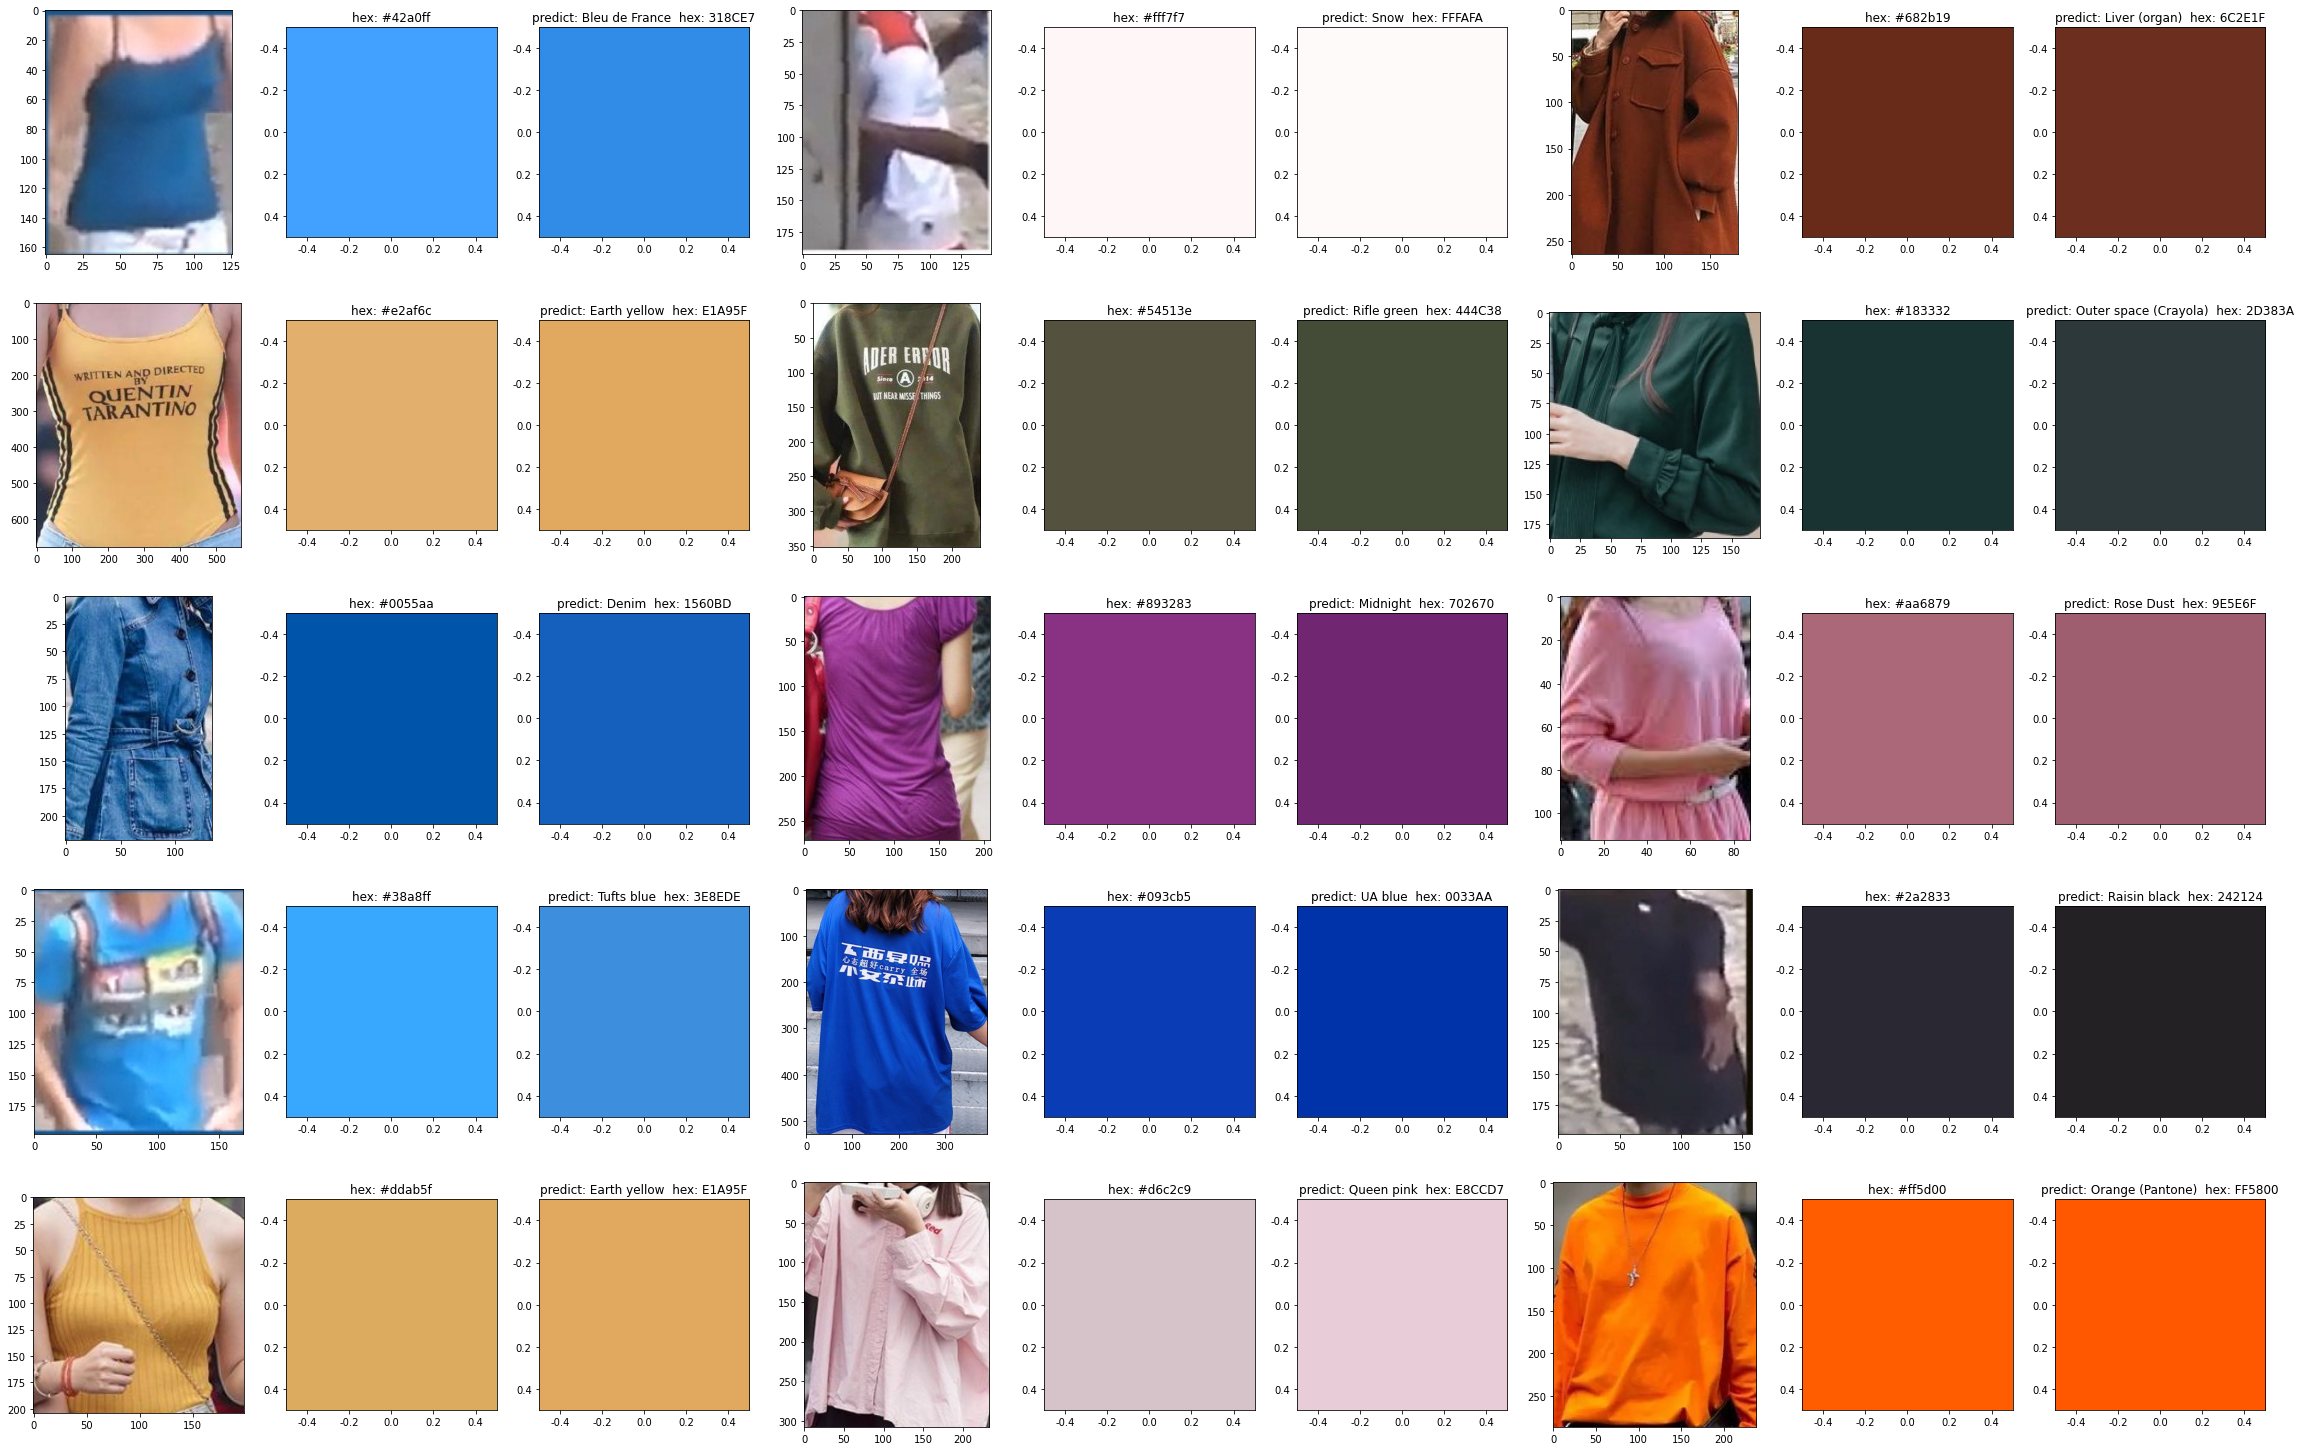

In [68]:
plt.figure(figsize=(40, 80))

for i,img_path in enumerate(imgs_path[:15]):
    
    #原始圖片
    img = cv2.imread(img_path)
    plt.subplot(15,9,3*i+1)
    plt.imshow(img[:,:,::-1])
    
    #-----------------------------
    img_hsv = extract_hsv(img)
    img_rgb =  hsv2rgb(img_hsv)
    img_hex = rgb2hex(img_rgb)
    
    plt.subplot(15,9,3*i+2)
    plt.title('hex: ' + img_hex)
    plt.imshow([[img_rgb]])
    
    #------------------------------
    predict,hexcode = color_disance(img_hex)
    
    plt.subplot(15,9,3*i+3)

    plt.title('predict: ' + predict + '  hex: ' + hexcode)
    
    predict_rgb = hex2rgb(hexcode)
    plt.imshow([[predict_rgb]])

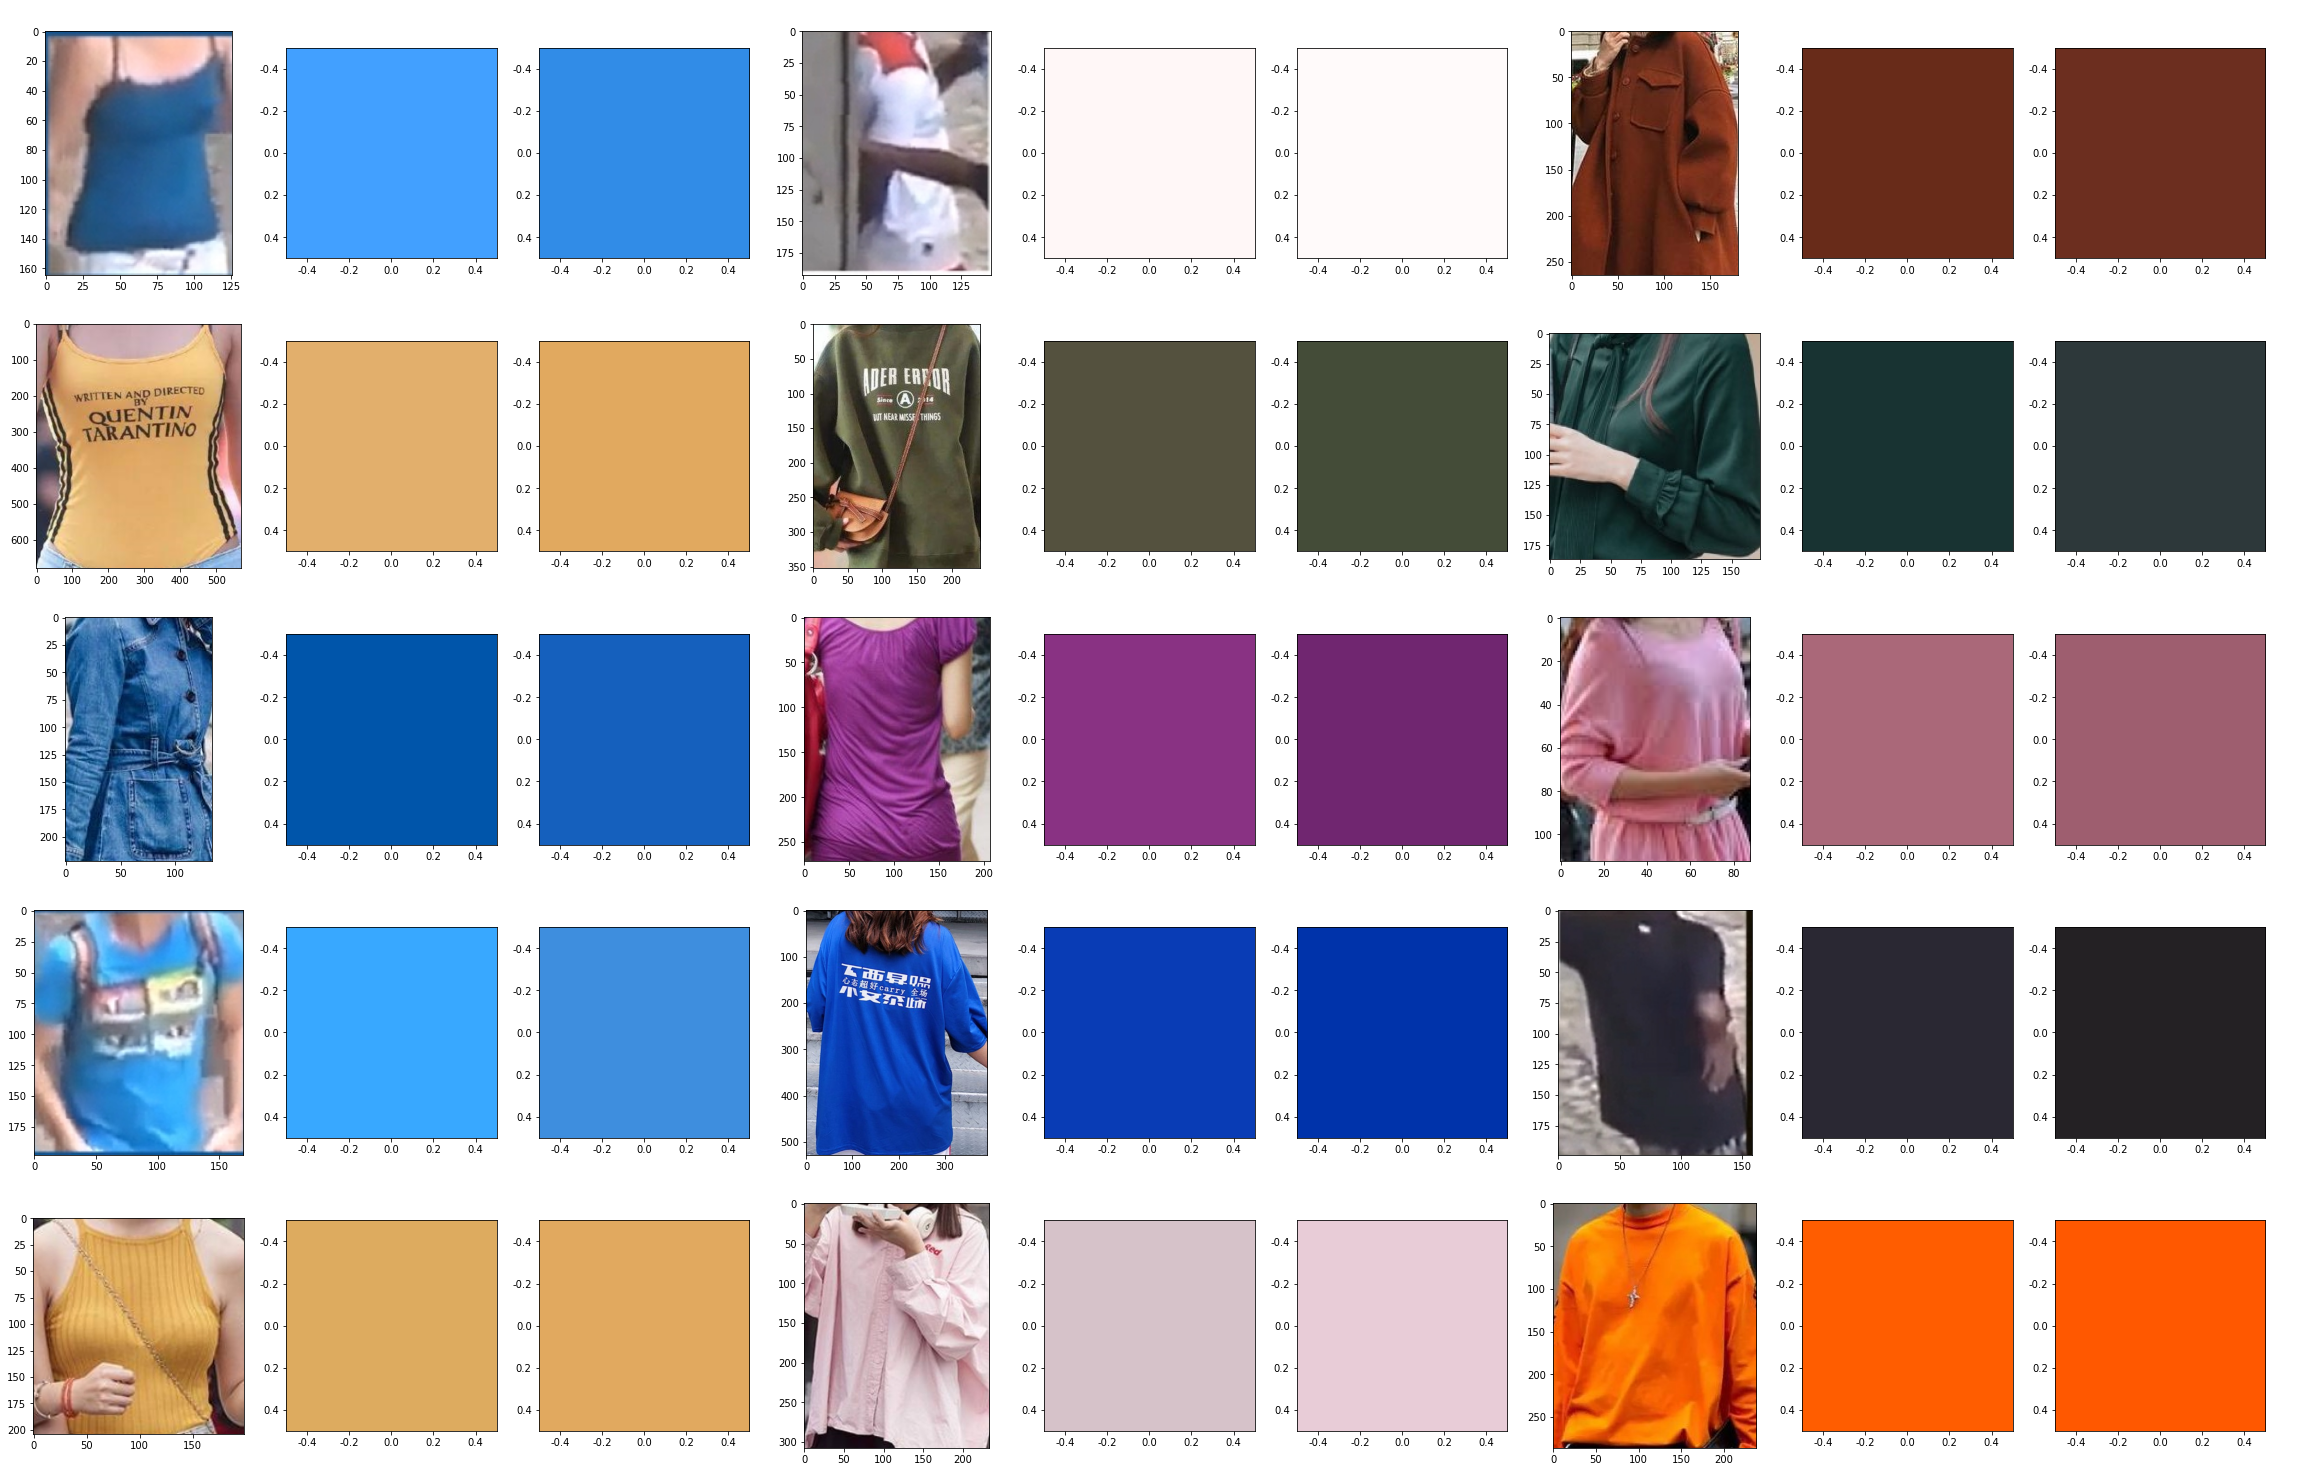

In [72]:
import matplotlib.pyplot as plt
import cv2

# Define a custom color for text (white in this case)
text_color = 'white'
font_size = 18  # Define the desired font size

plt.figure(figsize=(40, 80))

for i, img_path in enumerate(imgs_path[:15]):
    
    # 原始圖片
    img = cv2.imread(img_path)
    plt.subplot(15, 9, 3 * i + 1)
    plt.imshow(img[:, :, ::-1])
    
    #-----------------------------
    img_hsv = extract_hsv(img)
    img_rgb = hsv2rgb(img_hsv)
    img_hex = rgb2hex(img_rgb)
    
    plt.subplot(15, 9, 3 * i + 2)
    plt.title('Hex: ' + img_hex, color=text_color, fontsize=font_size)
    plt.imshow([[img_rgb]])
    
    #------------------------------
    predict, hexcode = color_disance(img_hex)
    
    plt.subplot(15, 9, 3 * i + 3)
    plt.title('Predict: ' + predict + '\nhex: ' + hexcode, color=text_color, fontsize=font_size)
    
    predict_rgb = hex2rgb(hexcode)
    plt.imshow([[predict_rgb]])

plt.show()